<a href="https://colab.research.google.com/github/samsomsabu/machine_learning/blob/ADVANCED-ML/2348549_Prog2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
df = pd.read_csv('/content/Program_2_Dataset.csv')

In [29]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [31]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [32]:
predictors = df[['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']]

In [33]:
vif = pd.DataFrame()
vif["Predictors"] = predictors.columns
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

In [34]:
print(vif)

         Predictors        VIF
0         Avg_rooms  16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374


Since we have High VIF values for Avg_rooms and Property_TaxRate we are going to not choose them. As their VIF is above 10

Text(0.5, 1.0, 'Non-Retail Acres vs Median Value')

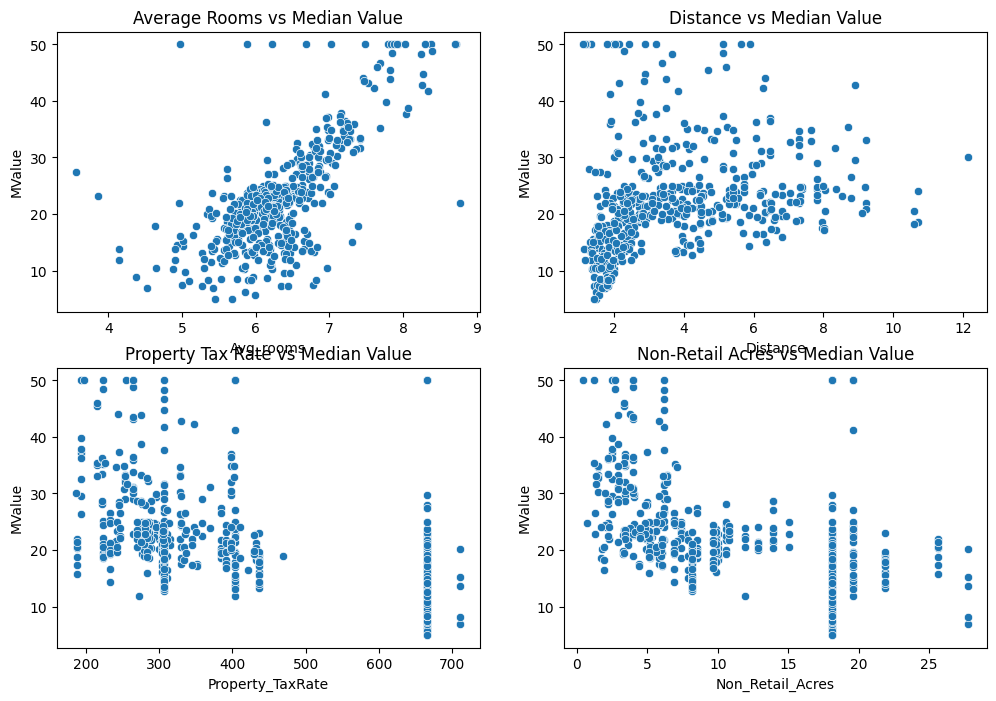

In [35]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Avg_rooms', y='MValue', data=df)
plt.title('Average Rooms vs Median Value')
plt.subplot(2, 2, 2)
sns.scatterplot(x='Distance', y='MValue', data=df)
plt.title('Distance vs Median Value')
plt.subplot(2, 2, 3)
sns.scatterplot(x='Property_TaxRate', y='MValue', data=df)
plt.title('Property Tax Rate vs Median Value')
plt.subplot(2, 2, 4)
sns.scatterplot(x='Non_Retail_Acres', y='MValue', data=df)
plt.title('Non-Retail Acres vs Median Value')

In [36]:
selected_predictors = df[['Distance', 'Non_Retail_Acres']]
y = df['MValue']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(selected_predictors, y, test_size=0.33, random_state=42)

In [38]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (339, 2) (339,)
Testing set shape: (167, 2) (167,)


In [39]:
model = LinearRegression()


In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
train_predictions = model.predict(X_train)

In [42]:
test_predictions = model.predict(X_test)

In [43]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.27856928 -0.9452116 ]
Intercept: 38.091225709521446


The negative coefficients suggest that a negative relationship with the target variable. As the distance to employment centers increases and the proportion of non-retail business acres increases, the median home value tends to decrease.

In [44]:
# To Calculate the mean squared error for both train and testing sest
mseForTrain = mean_squared_error(y_train, train_predictions)
mseForTest = mean_squared_error(y_test, test_predictions)

# To Calculate the R-squared value
r2train = r2_score(y_train, train_predictions)
r2test = r2_score(y_test, test_predictions)

# To Calculate adjusted R-squared value for training set
n_train, p_train = X_train.shape
adjusted_r2_train = 1 - ((1 - r2train) * (n_train - 1) / (n_train - p_train - 1))

# To Calculate adjusted R-squared value for testing set
n_test, p_test = X_test.shape
adjusted_r2_test = 1 - ((1 - r2test) * (n_test - 1) / (n_test - p_test - 1))



In [45]:
print("MSE for Train Set: ", mseForTrain)
print("MSE for Testing Set: ", mseForTest)
print("R2 for Train: ", r2train)
print("R2 for Testing: ", r2test)
print("R2 for Train Adjusted: ", adjusted_r2_train)
print("R2 for Test Adjusted: ", adjusted_r2_test)

MSE for Train Set:  67.67782670758363
MSE for Testing Set:  55.770639488944795
R2 for Train:  0.2581499484166435
R2 for Testing:  0.20665217673469405
R2 for Train Adjusted:  0.25373417430007594
R2 for Test Adjusted:  0.19697720328023915


From the output we can infer the following:
MSE for Testing set will give us better performance for the model as its having lower MSE value compared to Train Set.

R2 we have 26% and 20% variance for the two sets, which is limitting the performance of the model.

Adjusted R2 also have similar trends. We want the R2 values to be higher for a better model.

We can say that the model maybe **underfitting** as the relation between the predictor and target variable not so well captured.